In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.svar_model import SVAR



import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

import os
os.chdir('/Users/kyuyeonhwang/Desktop')

import numpy.linalg as npl

In [5]:
china_ma = pd.read_excel('china_ma.xlsx')

In [7]:
def perform_df_test(data, column, regression_type):
    test_result = adfuller(data[column], maxlag=0,
                           autolag=None, regression=regression_type)
    test_stat, p_value, nobs, critical_values = test_result[
        0], test_result[1], test_result[3], test_result[4]

    print(
        f"Augmented Dickey-Fuller test ({column}) without lag ({regression_type}):")
    print(f"Test statistic = {test_stat:.4f}")
    print(f"P-value = {p_value:.4f}")
    print(f"Number of observations used = {nobs}")
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f"\t{key}: {value:.3f}")
    
    if p_value < 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

    print("")

    return test_stat, p_value, nobs, critical_values

In [8]:
for column in ['GDP', 'GS', 'Capital', 'Rn']:
    for regression_type in ['n', 'c', 'ctt']:
        result = perform_df_test(china_ma, column, regression_type)

Augmented Dickey-Fuller test (GDP) without lag (n):
Test statistic = -2.2818
P-value = 0.0216
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GDP) without lag (c):
Test statistic = -3.0797
P-value = 0.0281
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (GDP) without lag (ctt):
Test statistic = -3.4421
P-value = 0.1283
Number of observations used = 93
Critical Values:
	1%: -4.500
	5%: -3.897
	10%: -3.593
Non-stationary

Augmented Dickey-Fuller test (GS) without lag (n):
Test statistic = -3.4404
P-value = 0.0006
Number of observations used = 93
Critical Values:
	1%: -2.590
	5%: -1.944
	10%: -1.614
Stationary

Augmented Dickey-Fuller test (GS) without lag (c):
Test statistic = -6.7392
P-value = 0.0000
Number of observations used = 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Stationary

Augmented Dickey-Fuller test (G

In [9]:
VAR_ma = VAR(endog=china_ma)
lag_select = VAR_ma.select_order(maxlags=5)
lag_select.summary()

,AIC,BIC,FPE,HQIC
0,-9.639,-9.527,6.516e-05,-9.594
1,-13.23,-12.67,1.805e-06,-13.00
2,-14.63,-13.62*,4.448e-07,-14.22
3,-14.88,-13.43,3.470e-07,-14.30*
4,-14.99,-13.09,3.150e-07,-14.22
5,-15.05*,-12.70,3.023e-07*,-14.10


In [11]:
results_ma = VAR_ma.fit(ic='bic')

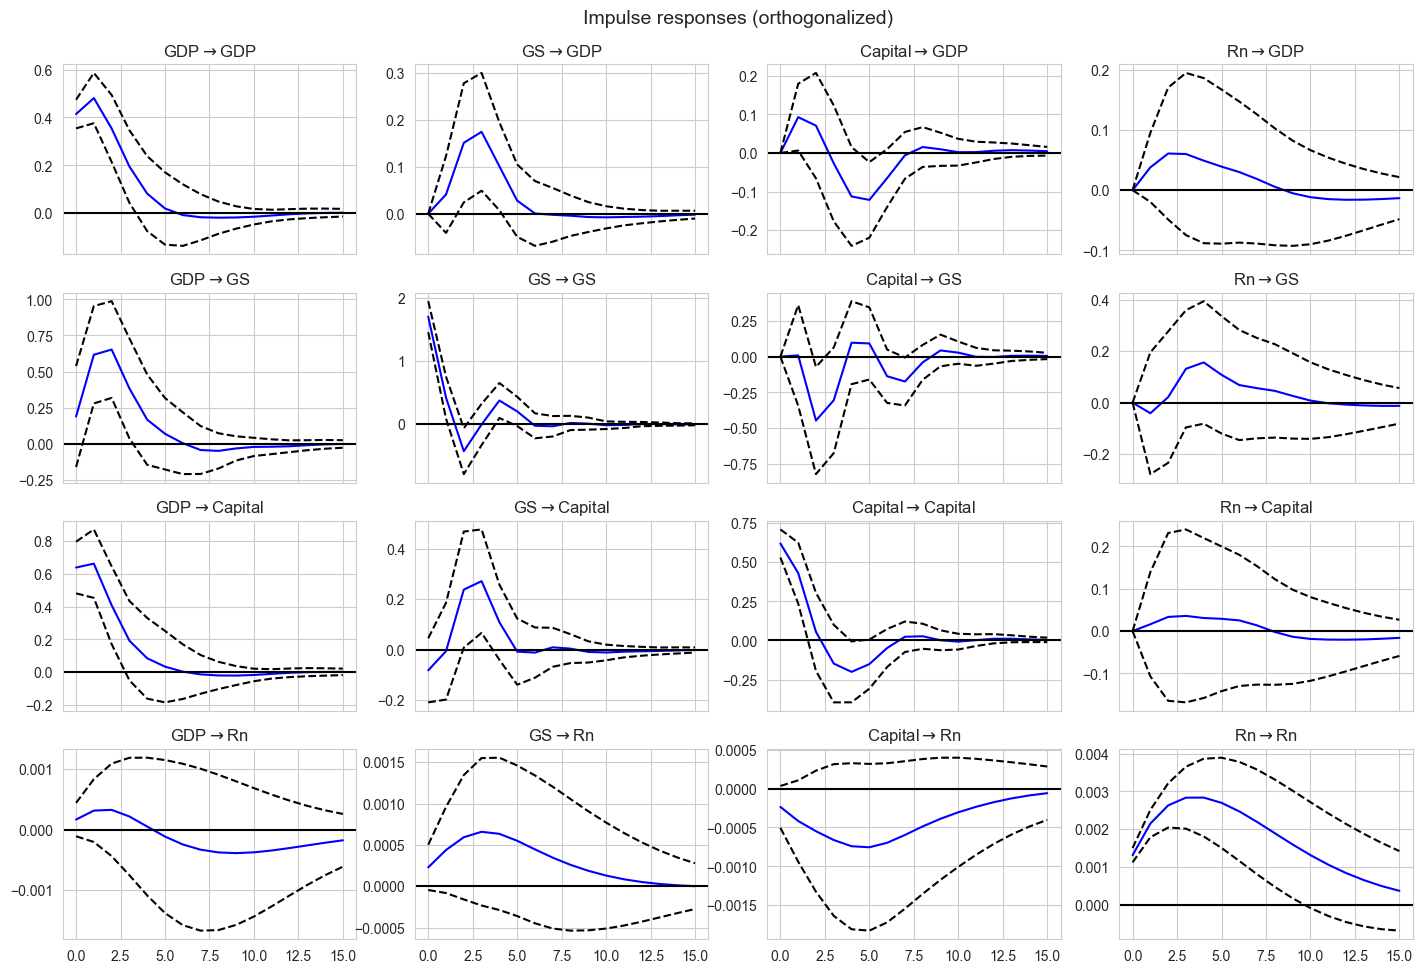

In [12]:
results_ma.summary()

irf_var_ma = results_ma.irf(periods=15)
figsvar = irf_var_ma.plot(orth=True, figsize=(15,10))
plt.show()

In [42]:
#define structural inputs
A = np.asarray([[1, 0, 0, 0],['E', 1, 0, 0],['E', 'E', 1, 0],['E', 'E', 'E', 1]])
B = np.asarray([['E', 0, 0, 0], [0, 'E', 0, 0], [0, 0, 'E', 0],[0, 0, 0, 'E']])
SVAR_model_ma = SVAR(china_ma, svar_type='AB', A=A, B=B)
res_ma = SVAR_model_ma.fit(maxlags=4, maxiter=100, maxfun=100, solver='bfgs')

In [43]:
res_ma.A, res_ma.B

(array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-3.77811859e-01,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-1.55887983e+00,  5.06527395e-02,  1.00000000e+00,
          0.00000000e+00],
        [-4.07546358e-04, -2.12393076e-04,  1.82311128e-04,
          1.00000000e+00]]),
 array([[4.12926961e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.58724222e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 5.46794248e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.10165998e-03]]))

In [44]:
res_ma.sigma_u

array([[ 1.70508680e-01,  6.44199955e-02,  2.62539497e-01,
         3.53079038e-05],
       [ 6.44199955e-02,  2.54367631e+00, -2.84213364e-02,
         5.71682457e-04],
       [ 2.62539497e-01, -2.84213364e-02,  7.09691097e-01,
        -2.84275269e-05],
       [ 3.53079038e-05,  5.71682457e-04, -2.84275269e-05,
         1.35465696e-06]])

In [ ]:
P = np.dot(npl.inv(res_ma.A), res_ma.B)
np.dot(P,P.T)

array([[ 1.70508676e-01,  6.44201997e-02,  2.62539476e-01,
         3.53087260e-05],
       [ 6.44201997e-02,  2.54367657e+00, -2.84208368e-02,
         5.71694945e-04],
       [ 2.62539476e-01, -2.84208368e-02,  7.09691039e-01,
        -2.84239554e-05],
       [ 3.53087260e-05,  5.71694945e-04, -2.84239554e-05,
         1.35465070e-06]])